# Data Visualisation

In [3]:
import pandas as pd

## Single Label - Original vs Current

In [4]:
# This is using situation awareness and the comms are exclusive 
single_og_other = pd.read_csv("data/original-labels.csv")
single_original = single_og_other[single_og_other["Label"] != "Other"]
# This is the one where the situation awareness is split up 
single_updated_other = pd.read_csv("data/adjusted-labels-comms-exclusive.csv") 
single_updated = single_updated_other[single_updated_other["Label"] != "Other"]
# This is the one where the situation awareness is split up and it's labelled by importance 
single_importance_other = pd.read_csv("data/adjusted-labels-prioritised-importance.csv") 
single_importance = single_importance_other[single_importance_other["Label"] != "Other"]

In [5]:
single_original.head()

,Sentence,Label
0,i'm leaving now and where is foxtrot five at n...,Communications
1,charlie tuna said that direction how fast foun...,Rescue words
2,could we have a water tanker at,Fire words
3,charlie house empty going to holvern denston o...,Rescue words
4,this is charlie at yet as a handful of people ...,Reasoning words


In [6]:
single_updated.head()

,Sentence,Label
0,ed in as the wind direction is heading west i ...,Buildings
1,charlie starts evacuations in greenhill in low...,Hills and Forests
2,now they can when you're on it just click on t...,Named Locations
3,charlie and said he won't firetruck down to yo...,Woods
4,charlie good job quality mission accomplished ...,Fire words


In [7]:
single_importance.head()

,Sentence,Label
0,at all how are you saying that we do not know ...,Action words
1,alpha confirm where you want foxtrot 6 over,Communications
2,charlie nothing is yet just to make sure it do...,Communications
3,roger out you want to send one unit north to h...,Woods
4,this is charlie it looks like the fire spread ...,Reasoning words


In [8]:
so_sentences = single_original["Sentence"]
so_labels = single_original["Label"]

su_sentences = single_updated["Sentence"]
su_labels = single_updated["Label"]

si_sentences = single_importance["Sentence"]
si_labels = single_importance["Label"]

Distribution of data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Single Label Original Pattern 

In [10]:
so_label_counts = so_labels.value_counts()

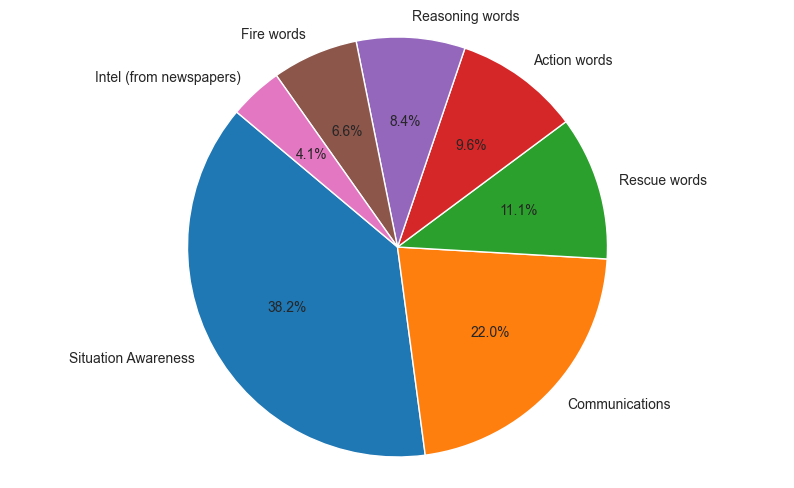

In [11]:
# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(so_label_counts, labels=so_label_counts.index, autopct="%1.1f%%", startangle=140)
# plt.title('Distribution of Sentences by Label: Original Labels')
plt.axis('equal')
plt.show()

### Single Label Updated Pattern

In [12]:
su_label_counts = su_labels.value_counts()

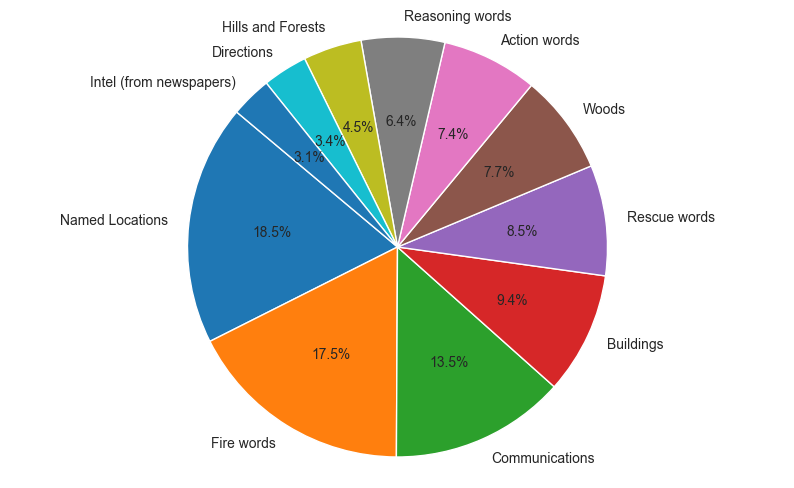

In [13]:
# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(su_label_counts, labels=su_label_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Sentences by Labels: Situation Awareness Broken Down')
plt.axis('equal')
plt.show()

In [14]:
si_label_counts = si_labels.value_counts()

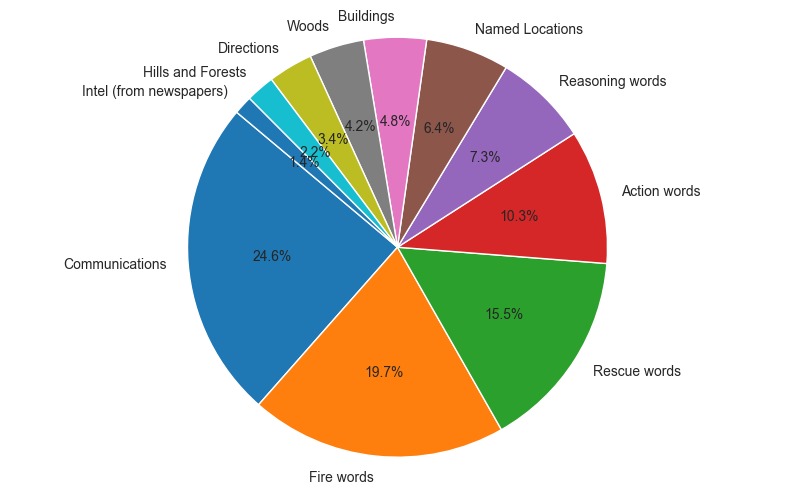

In [15]:
# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(si_label_counts, labels=si_label_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Sentences by Labels: Labelled based on Importance')
plt.axis('equal')
plt.show()

## Multilabel Patterns - Original vs Updated

In [16]:
multi_original = pd.read_excel("data/original-labels-multiclass.xlsx")
multi_updated = pd.read_excel("data/adjusted-labels-multiclass.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'data/original-labels-multiclass.xlsx'

In [ ]:
multi_original.head()

In [ ]:
multi_updated.head()

In [ ]:
mo_sentences = multi_original["Sentence"]
mo_labels = multi_updated.drop(columns=["Sentence"])

mu_sentences = multi_updated["Sentence"]
mu_labels = multi_updated.drop(columns=["Sentence"])

### Multilabel Original Patterns 

In [ ]:
# Calculate the overlap between labels
mo_overlap_matrix = multi_original.iloc[:, 1:].T.dot(multi_original.iloc[:, 1:])

In [ ]:
# Create a heatmap to visualize the overlap between labels
plt.figure(figsize=(10, 8))
sns.heatmap(mo_overlap_matrix, cmap="BrBG", annot=True, fmt='g', 
            xticklabels=mo_overlap_matrix.columns, yticklabels=mo_overlap_matrix.columns)
plt.title('Overlap Between Labels using the Original Patterns')
plt.xlabel('Labels')
plt.ylabel('Labels')
plt.show()

### Multilabel Updated Patterns

In [ ]:
mu_overlap_matrix = multi_updated.iloc[:, 1:].T.dot(multi_updated.iloc[:, 1:])

In [17]:
# Create a heatmap to visualize the overlap between labels
plt.figure(figsize=(10, 8))
sns.heatmap(mu_overlap_matrix, cmap="BrBG", annot=True, fmt='g', 
            xticklabels=mu_overlap_matrix.columns, yticklabels=mu_overlap_matrix.columns)
plt.title('Overlap Between Labels using the Updated Patterns')
plt.xlabel('Labels')
plt.ylabel('Labels')
plt.show()

NameError: name 'mu_overlap_matrix' is not defined

<Figure size 1000x800 with 0 Axes>

In [18]:
#Drop communications
mu_overlap_matrix = multi_updated.iloc[:, 2:].T.dot(multi_updated.iloc[:, 2:])

NameError: name 'multi_updated' is not defined

In [19]:
# Create a heatmap to visualize the overlap between labels
plt.figure(figsize=(15, 8))
sns.heatmap(mu_overlap_matrix, cmap="BrBG", annot=True, fmt='g',
            xticklabels=mu_overlap_matrix.columns, yticklabels=mu_overlap_matrix.columns)
plt.title('Overlap Between Labels using the Updated Patterns')
plt.xlabel('Labels')
plt.ylabel('Labels')
plt.show()

NameError: name 'mu_overlap_matrix' is not defined

<Figure size 1500x800 with 0 Axes>

# Visualising the data split between train and test

## This is for the adjusted exclusive dataset

In [20]:
from sklearn.model_selection import train_test_split

raw_data = pd.read_csv("data/adjusted-labels-comms-exclusive.csv")
filtered_data = raw_data[raw_data["Label"] != "Other"]

sentences = filtered_data["Sentence"]
labels = filtered_data["Label"]

X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.20, random_state=47)

In [21]:
train_label_counts = y_train.value_counts()
test_label_counts = y_test.value_counts()

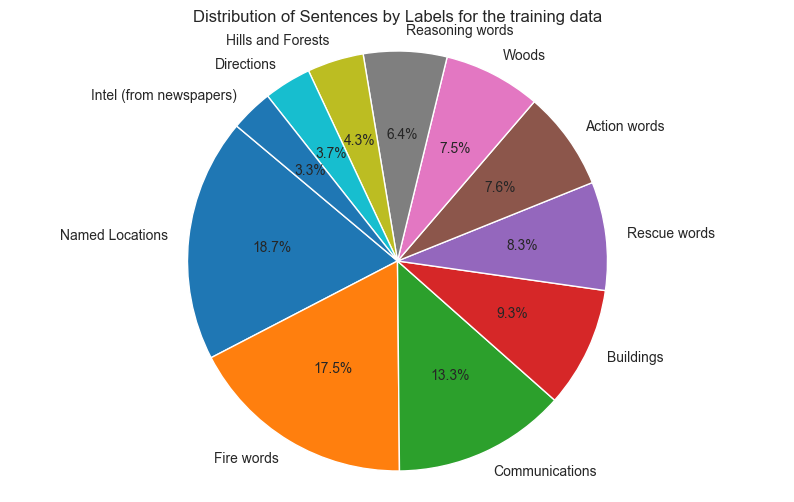

In [22]:
# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(train_label_counts, labels=train_label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentences by Labels for the training data')
plt.axis('equal')
plt.show()

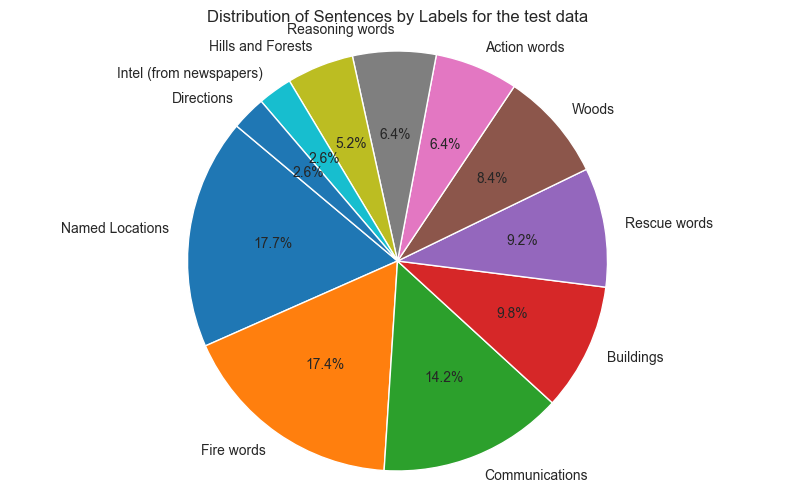

In [23]:
# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(test_label_counts, labels=test_label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentences by Labels for the test data')
plt.axis('equal')
plt.show()